In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
# definimos una función para representar el resultado del ajuste
def plot_decision_boundary(X,y,h,model):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .05  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Zd = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Zd = Zd.reshape(xx.shape)
    
    Zp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] 
    Zp = Zp.reshape(xx.shape)
    
    # Error de clasificación
    ypred = model.predict(X)
    acc = accuracy_score(y,ypred)
    
    plt.figure(1, figsize=(12, 5))
    
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.contour(xx, yy, Zd, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zd,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'FRONTERA DECISION\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    #plt.contour(xx, yy, Zp, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zp,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'PROBABILIDAD\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.tight_layout()
    plt.show()

In [3]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [4]:
data = pd.read_csv('census.csv', sep=',', decimal='.')
print('N, D: ', data.shape)
data.head()

N, D:  (45222, 14)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
data['income'].value_counts()/data.shape[0]

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [6]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [8]:
# transformamos las variables categorizadas a numeros para manejarlas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['workclass'] = le.fit_transform(data['workclass'])
data['education_level'] = le.fit_transform(data['education_level'])
data['marital-status'] = le.fit_transform(data['marital-status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['sex'] = le.fit_transform(data['sex'])
data['native-country'] = le.fit_transform(data['native-country'])
data['income'] = le.fit_transform(data['income'])

print('N, D: ', data.shape)
data.head()

N, D:  (45222, 14)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


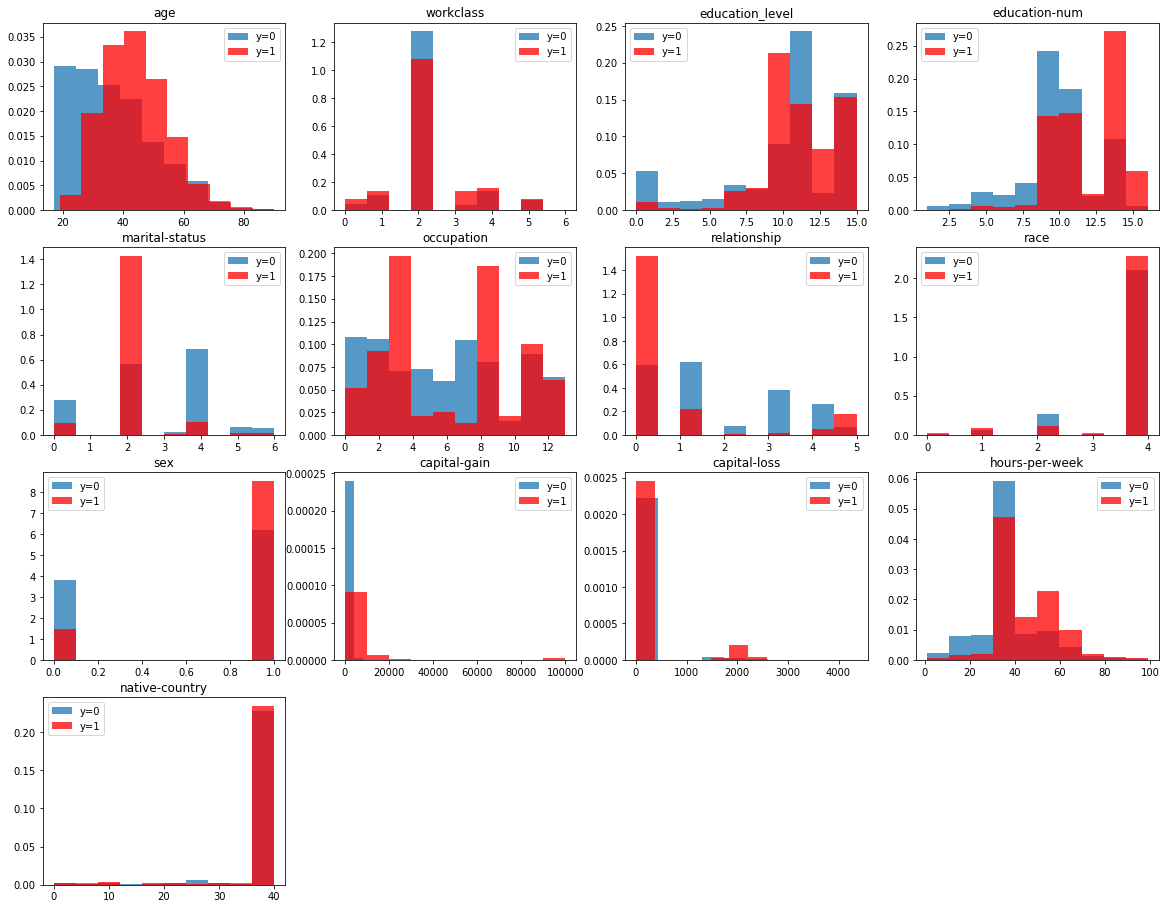

In [9]:
#pintamos en histograma las clases
plt.figure(figsize=(20,20))

idx_0 =  data['income'] == 0
idx_1 =  data['income'] == 1

for i,feature in enumerate(data.columns.drop(['income'])):
    plt.subplot(5,4,i+1)   
    plt.hist(data.ix[idx_0,feature],normed=1, alpha=0.75,label='y=0')
    plt.hist(data.ix[idx_1,feature],normed=1, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

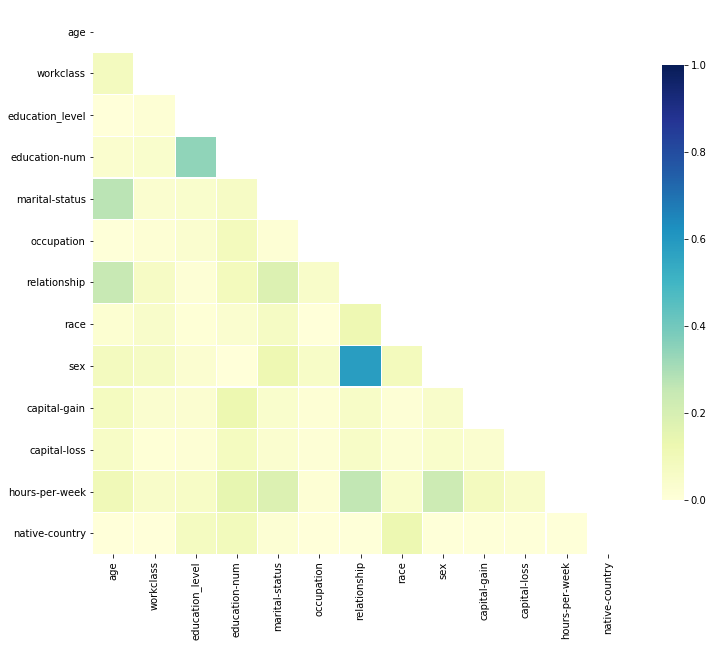

In [10]:
#comprobamos correlacion entre las variables, vemos que no hay ninguna especialmente correlacionada, si fuera asi
#lo mejor seria eliminarlas para que no afectaran al modelo
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['income'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# preparamos los datos, separamos train 75% de test 25% y luego escalamos las variables
features = data.columns.drop('income')

X = data[features].as_matrix()
y = data['income'].as_matrix()

#from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder(categorical_features = [1,2,4,5,6,7,12], sparse=False, n_values=[8,16,7,14,6,5,41]) 
#X = enc.fit_transform(X)


# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
#escalamos variables aunque para random forest no haría falta
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

Datos train:  (33916, 13)
Datos test:   (11306, 13)
Propocion train:0.250
Propocion test: 0.242


In [12]:
#Calculamos la regresion logistica
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1).fit(Xs_train,y_train)
y_pred = lr.predict(Xs_train)

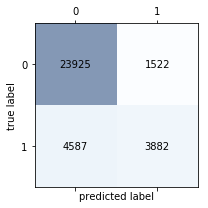

In [13]:
from sklearn.metrics import confusion_matrix
#Generamos matriz de consusion
confmat = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(confmat)
#para acceder a los valores de las matrices y que devuelva los valores dentro
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

In [14]:
acc = (tp+tn)/(tn + fp + fn + tp)
sen = tp/(tp+fn)
esp = tn/(tn+fp)
ppv = tp/(tp+fp)
fsc = 2*(sen*ppv/(sen+ppv))

print('ACC: ', acc)
print('SEN: ', sen)
print('ESP: ', esp)
print('PPV: ', ppv)
print('FSC: ', fsc)

ACC:  0.8198785234107796
SEN:  0.4583776124690046
ESP:  0.9401894132903682
PPV:  0.7183567727609178
FSC:  0.5596482375837959


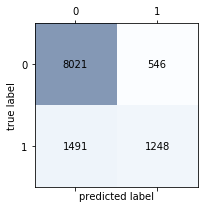

In [15]:
y_pred_test = lr.predict(Xs_test)
confmat_test=confusion_matrix(y_test,y_pred_test)
plot_confusion_matrix(confmat_test)
#para acceder a los valores de las matrices y que devuelva los valores dentro
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

In [16]:
acc_test = (tp_test+tn_test)/(tn_test + fp_test + fn_test + tp_test)
sen_test = tp_test/(tp_test+fn_test)
esp_test = tn_test/(tn_test+fp_test)
ppv_test = tp_test/(tp_test+fp_test)
fsc_test = 2*(sen_test*ppv_test/(sen_test+ppv_test))

print('ACC: ', acc_test)
print('SEN: ', sen_test)
print('ESP: ', esp_test)
print('PPV: ', ppv_test)
print('FSC: ', fsc_test)

ACC:  0.8198301786661949
SEN:  0.4556407447973713
ESP:  0.936267071320182
PPV:  0.6956521739130435
FSC:  0.5506287227001985


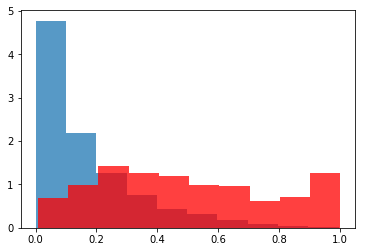

In [17]:
#obtenemos la probabilidad
y_prob = lr.predict_proba(Xs_test)[:,1]
idx_0 = [y_test==0]
idx_1 = [y_test==1]

plt.hist(y_prob[idx_0],normed=1, alpha=0.75, label='y=0')
plt.hist(y_prob[idx_1],normed=1, facecolor='red', alpha=0.75, label='y=1')
plt.show()

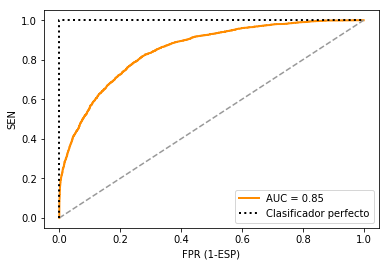

In [18]:
#dibujamos curva Roc
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

best mean cross-validation score: 0.852
best parameters: {'max_depth': 8}


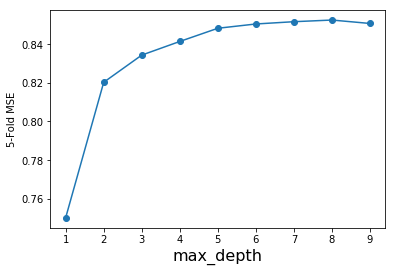

In [19]:
#Probamos con Arboles de decision
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [20]:
#Comprobamos el comportamiento en entrenamiento y test
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.8578841844557141
Test:  0.8531753051477092


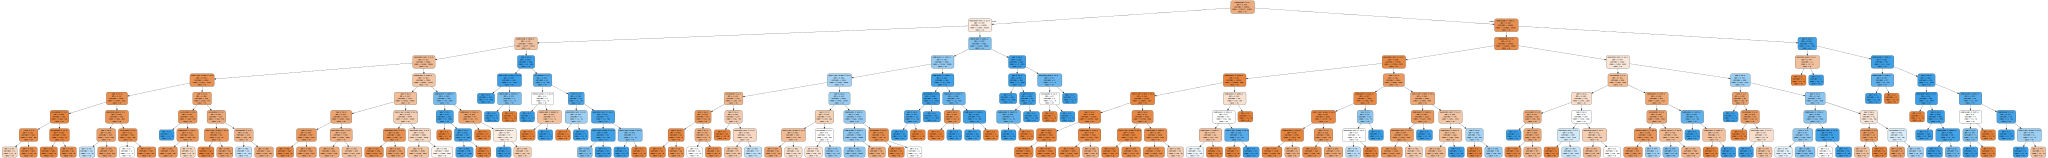

In [21]:
#Mostramos el arbol de decision
from sklearn.tree import export_graphviz
import graphviz

tree_dot = export_graphviz(treeModel, out_file=None, feature_names=features, class_names=['B','M'],  
                         filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(tree_dot) 
graph

best mean cross-validation score: 0.860
best parameters: {'max_depth': 14}


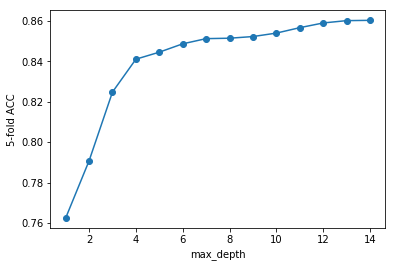

In [22]:
#intentamos mejorar los ratios entrenando con random forest
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [23]:
#comprobamos las prestacines que en este caso mejoran en tres puntos en train y 1 en test
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.8891968392499116
Test:  0.8608703343357509


In [24]:
#cambiamos max_depth y subimos a 10, por debajo de 14 que es lo que nos recomienda no obtenemos ganancia
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=10,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.8635747139992924
Test:  0.8579515301609765


In [25]:
# NOs quedamos con el valor 20 que es el que nos aumenta train, test se mantiene sobre el mejor anterior con max_depth=14
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=20,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.9350454062979124
Test:  0.8612241287811782


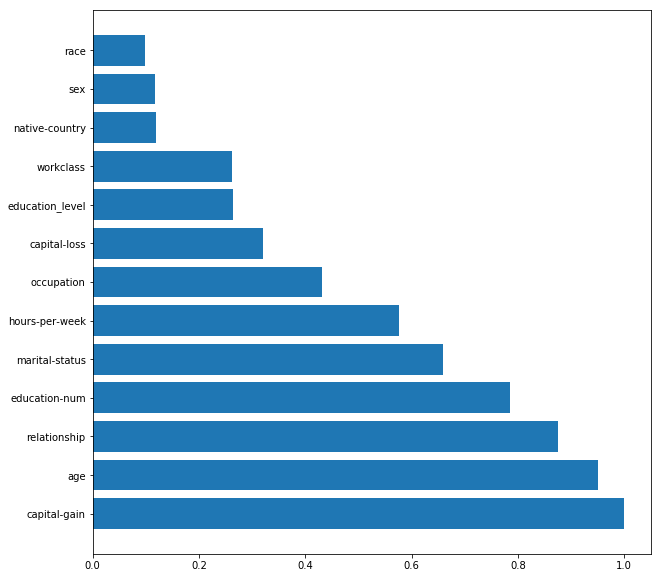

In [26]:
#representamos las variables por su importancia
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

In [27]:
#Utilizamos Boosted Trees para ver si mejoramos, primera comprobacion
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.869
best parameters: {'learning_rate': 0.5, 'n_estimators': 175}


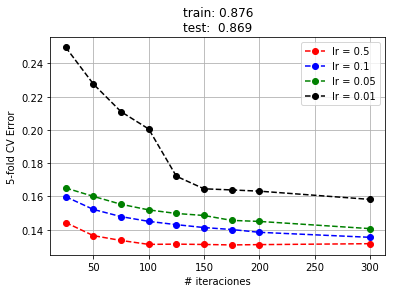

In [28]:
# calculamos métricas globales, vemos que no hemos mejorado
bt = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate= 0.5, n_estimators= 175)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [29]:
#Utilizamos Boosted Trees para ver si mejoramos, segunda comprobacion, subimos a max_depth 8
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=8

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=8), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.869
best parameters: {'learning_rate': 0.05, 'n_estimators': 150}


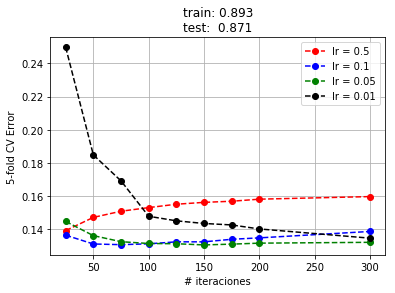

In [30]:
# calculamos métricas globales, seguimos sin llegar al mejor valor de random forest
bt = GradientBoostingClassifier(random_state=0, max_depth=8,learning_rate= 0.05, n_estimators= 150)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [31]:
#Utilizamos Boosted Trees para ver si mejoramos, tercera comprobacion, dejamos max_depth igual pero aumentamos valores
# en learningRate
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01,0.005]
# mantenemos max_depth estático: max_depth=8

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=8), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.869
best parameters: {'learning_rate': 0.05, 'n_estimators': 150}


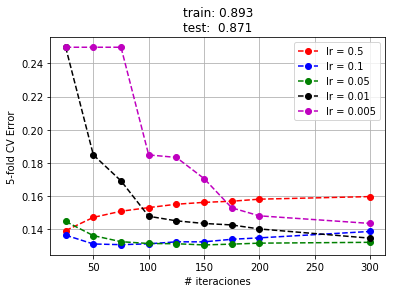

In [32]:
# calculamos métricas globales, no mejoramos con esta aproximacion
bt = GradientBoostingClassifier(random_state=0, max_depth=8,learning_rate= 0.05, n_estimators= 150)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [36]:
#Utilizamos Boosted Trees para ver si mejoramos, quinta comprobacion, aqui utilizamos los mejores valores que nos salieron
# en Random Forest
# que fue un max_depth de 14
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=14

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=14), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

KeyboardInterrupt: 

In [ ]:
# He tenido que cortarlo para poder entregar la práctica por eso da error, llevaba 14 horas y seguia dale que te pego, lo que 
# pretendia era ver si con el mismo valor que le mejor obtenido con random forest podia mejorar el resultado del algoritmo

In [ ]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=14,learning_rate= 0.1, n_estimators= 300)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

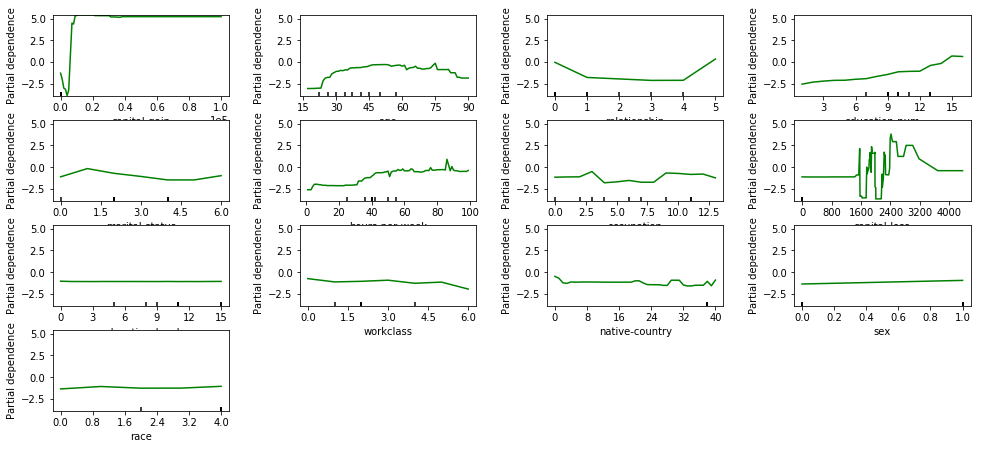

In [37]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, ax = plot_partial_dependence(bt, X_train, indices, feature_names=features,
                                 percentiles=(0.0, 1.0), n_cols = 4)
fig.set_size_inches(15, 10)
plt.show()

In [ ]:
#Utilizamos algoritmo SVM para clasificacion

In [ ]:
# paso 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

# Paso 2:
vectorC = np.logspace(-1, 3, 16)
vectorG = np.logspace(-9, -1, 24)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVC(kernel='rbf'), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)

In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [ ]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVC(kernel='rbf',gamma = Gopt, C = Copt, probability=True).fit(X_train,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(X_test,y_test))

In [ ]:
# No he llegado tampoco a terminar el SVC, el proceso se eternizaba, en mi equipo lo he tenido más de 24 horas y no termino